# HELP International Case Study

##  Importing and Understanding Data

In [61]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [62]:
#Importing all the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [63]:
# Loading dataset from day.csv into dataframe
df = pd.read_csv('Country-data.csv')
# Looking at the first five rows
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [64]:
# Looking at the missing values/datatypes/Shape of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


It could be observed that there are no missing values.<br>
Also , at this point we won't drop any of the column . Since,we can't predict which all columns would be useful for prediction

In [65]:
#Looking at the statistical summary
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Since, the columns Export,health and Import are percentages of gdpp. It can give problem in the later stages. 
So, we will convert to appropriate value.

In [66]:
#Derving the new columns with help of existing columns
df['exports_new'] = (df['exports']*df['gdpp'])/100
df['imports_new'] = (df['imports']*df['gdpp'])/100
df['health_new'] = (df['health']*df['gdpp'])/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exports_new,imports_new,health_new
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600


In [67]:
#Dropping the older columns Exports, Imports and Health
df = df.drop(columns = ['exports','imports','health'])
df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_new,imports_new,health_new
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600


# Data Preparation

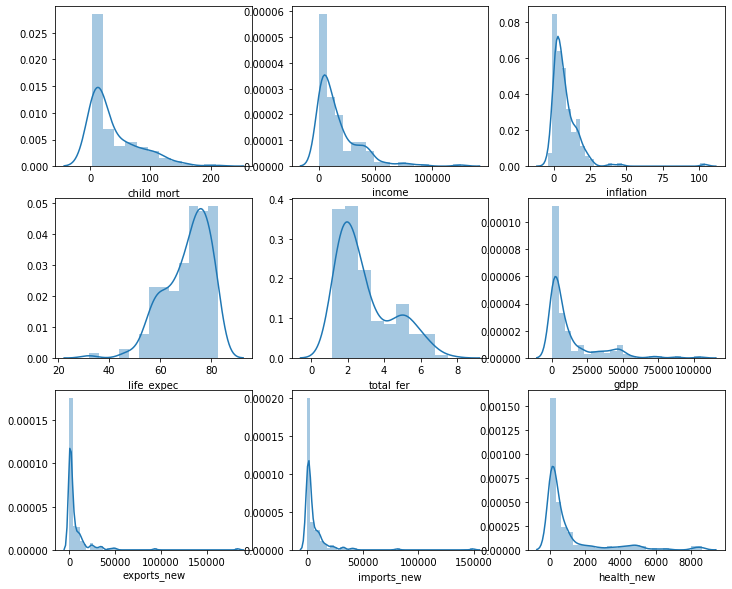

In [68]:
#Using histograms to see the distribution of all the numeric columns
plt.figure(figsize =(12,10))
feature = ['child_mort','income','inflation','life_expec','total_fer','gdpp','exports_new','imports_new','health_new']
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

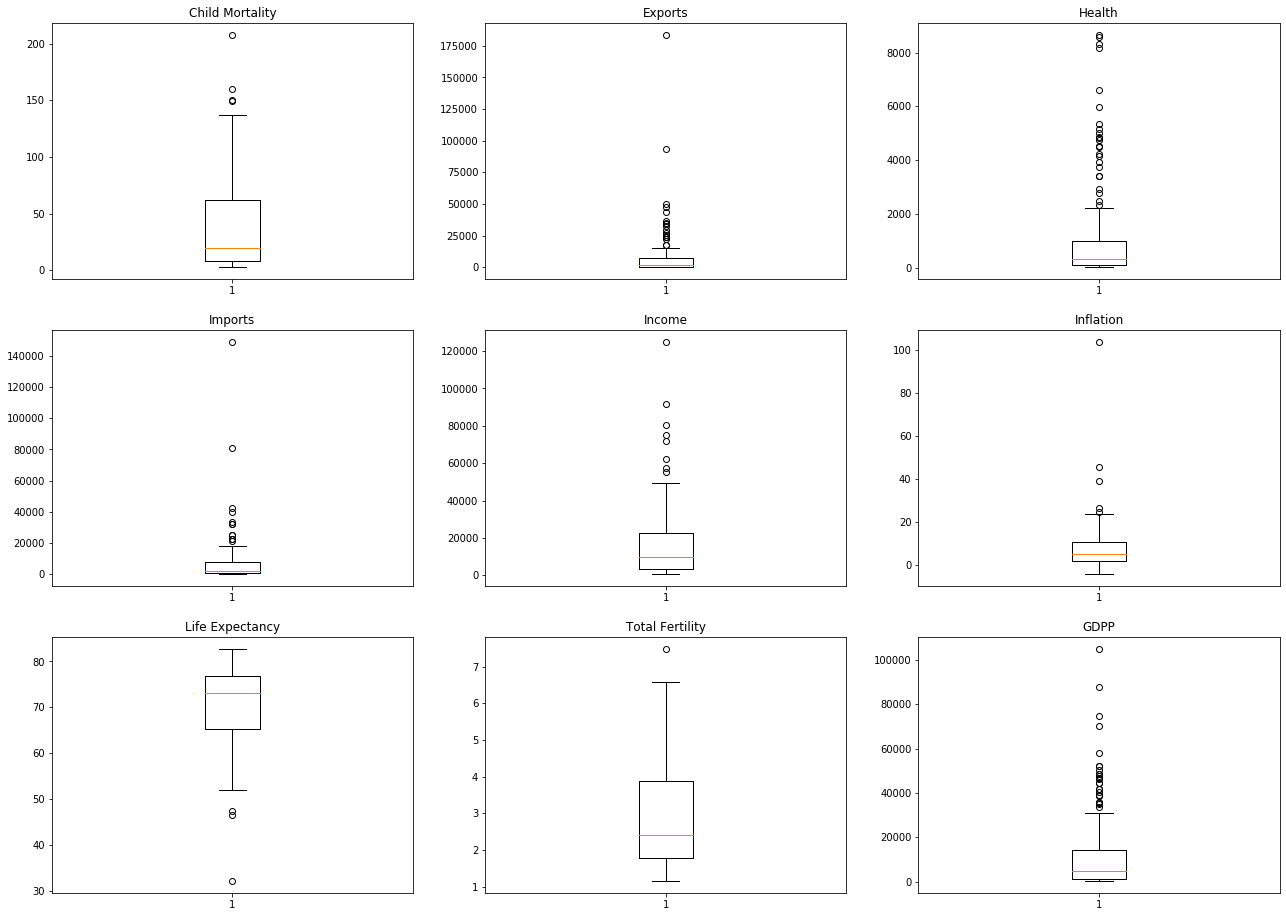

In [69]:
#Using boxplot to check for outliers present in columns of the data frame
fig, axs = plt.subplots(3, 3,figsize=(22,16))
axs[0, 0].boxplot(x='child_mort', data=df)
axs[0, 0].set_title('Child Mortality')
axs[0, 1].boxplot(x='exports_new', data=df)
axs[0, 1].set_title('Exports')
axs[0, 2].boxplot(x='health_new', data=df)
axs[0, 2].set_title('Health')
axs[1, 0].boxplot(x='imports_new', data=df)
axs[1, 0].set_title('Imports')
axs[1, 1].boxplot(x='income', data=df)
axs[1, 1].set_title('Income')
axs[1, 2].boxplot(x='inflation', data=df)
axs[1, 2].set_title('Inflation')
axs[2, 0].boxplot(x='life_expec', data=df)
axs[2, 0].set_title('Life Expectancy')
axs[2, 1].boxplot(x='total_fer', data=df)
axs[2, 1].set_title('Total Fertility')
axs[2, 2].boxplot(x='gdpp', data=df)
axs[2, 2].set_title('GDPP')
plt.show()

We can see that for some columns(Life Expectancy,Total Fer,Child Mortality,inflation,Exports,Imports), there are less outliers so we can cap those outliers using the IQR method as they will affect our Clustering algorithms. We won't do harsh capping,otherwise we may lose some values.While some columns have a large number of outliers, so will include them since they can form a new cluster.

In [70]:
#Capping column Inflation
q1 = df['inflation'].quantile(0.01)
q4 = df['inflation'].quantile(0.99)

df['inflation'][df['inflation']<=q1] = q1
df['inflation'][df['inflation']>=q4] = q4

In [71]:
#Capping column Total Fertility
q1 = df['total_fer'].quantile(0.01)
q4 = df['total_fer'].quantile(0.99)

df['total_fer'][df['total_fer']<=q1] = q1
df['total_fer'][df['total_fer']>=q4] = q4

In [72]:
#Capping column Life Expectancy
q1 = df['life_expec'].quantile(0.01)
q4 = df['life_expec'].quantile(0.99)

df['life_expec'][df['life_expec']<=q1] = q1
df['life_expec'][df['life_expec']>=q4] = q4

In [73]:
#Capping column Exports
q1 = df['exports_new'].quantile(0.01)
q4 = df['exports_new'].quantile(0.99)

df['exports_new'][df['exports_new']<=q1] = q1
df['exports_new'][df['exports_new']>=q4] = q4

In [74]:
#Capping column Imports
q1 = df['imports_new'].quantile(0.01)
q4 = df['imports_new'].quantile(0.99)

df['imports_new'][df['imports_new']<=q1] = q1
df['imports_new'][df['imports_new']>=q4] = q4

In [75]:
#Capping column Child_mortality
q1 = df['child_mort'].quantile(0.01)
q4 = df['child_mort'].quantile(0.99)

df['child_mort'][df['child_mort']<=q1] = q1
df['child_mort'][df['child_mort']>=q4] = q4

In [76]:
#Capping column Income
q1 = df['income'].quantile(0.01)
q4 = df['income'].quantile(0.99)

df['income'][df['income']<=q1] = q1
df['income'][df['income']>=q4] = q4

In [77]:
#Capping column GDPP
q1 = df['gdpp'].quantile(0.01)
q4 = df['gdpp'].quantile(0.99)

df['gdpp'][df['gdpp']<=q1] = q1
df['gdpp'][df['gdpp']>=q4] = q4

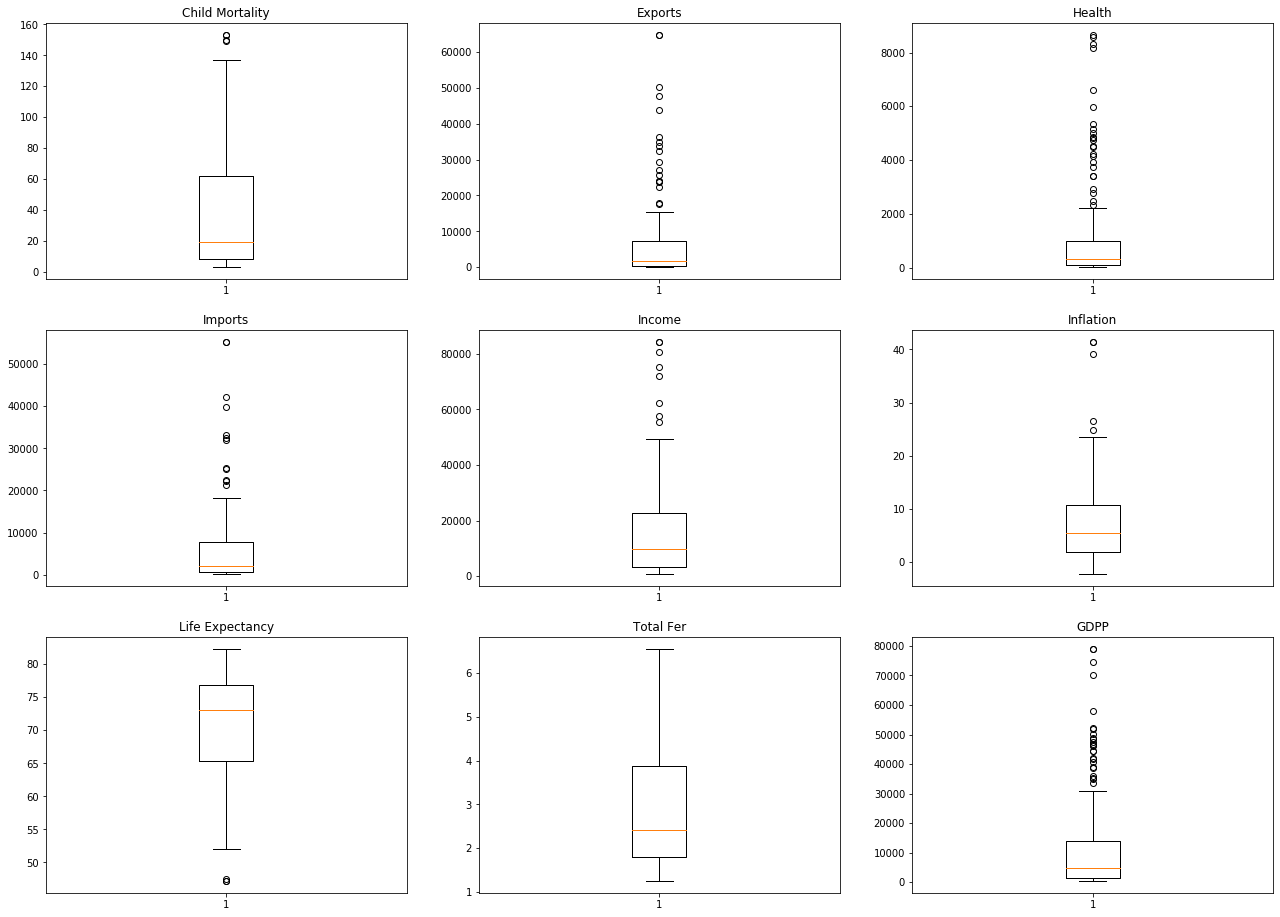

In [78]:
#Using boxplot to check for outliers present in columns of the data frame
fig, axs = plt.subplots(3, 3,figsize=(22,16))
axs[0, 0].boxplot(x='child_mort', data=df)
axs[0, 0].set_title('Child Mortality')
axs[0, 1].boxplot(x='exports_new', data=df)
axs[0, 1].set_title('Exports')
axs[0, 2].boxplot(x='health_new', data=df)
axs[0, 2].set_title('Health')
axs[1, 0].boxplot(x='imports_new', data=df)
axs[1, 0].set_title('Imports')
axs[1, 1].boxplot(x='income', data=df)
axs[1, 1].set_title('Income')
axs[1, 2].boxplot(x='inflation', data=df)
axs[1, 2].set_title('Inflation')
axs[2, 0].boxplot(x='life_expec', data=df)
axs[2, 0].set_title('Life Expectancy')
axs[2, 1].boxplot(x='total_fer', data=df)
axs[2, 1].set_title('Total Fer')
axs[2, 2].boxplot(x='gdpp', data=df)
axs[2, 2].set_title('GDPP')
plt.show()

We are good to go with this dataset

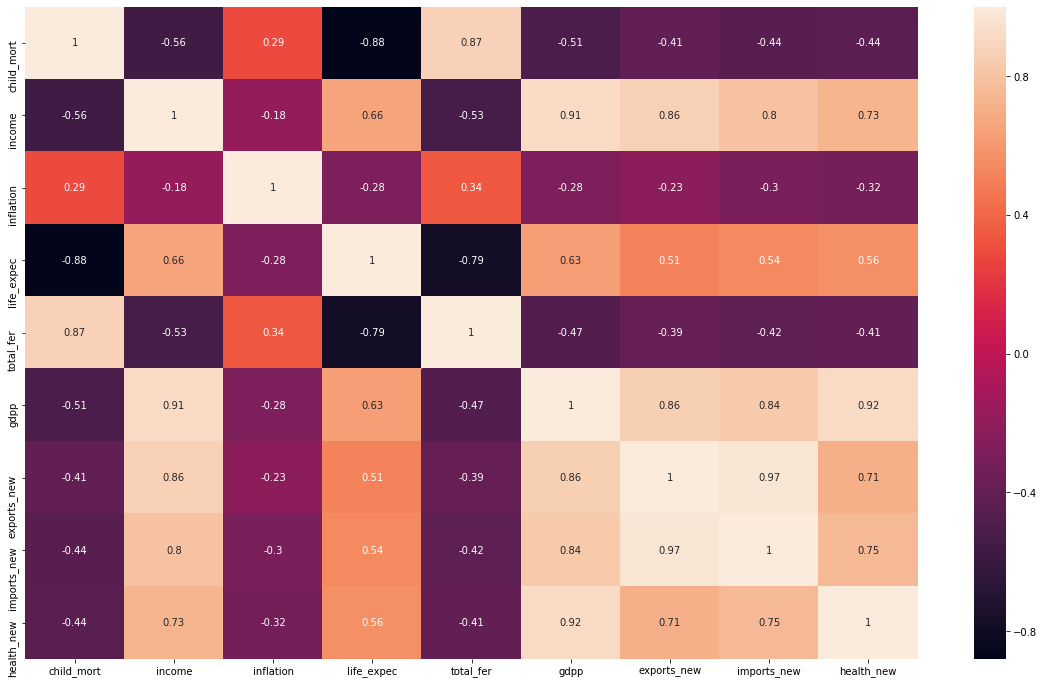

In [79]:
#visualising using heat maps
#Validating the assumption of Linear Regression : Little or no Multicollinearity between the features
pd.options.display.max_rows
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

## Clustering

In [80]:
#Storing the numeric columns in a new dataframe
df_wo_country = df[['child_mort','income','inflation','life_expec','total_fer','gdpp','exports_new','imports_new','health_new']]

In [81]:
#Scaling in order to bring all the column on same scale

# instantiate
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df_wo_country)
df_scaled.shape

(167, 9)

In [82]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['child_mort','income','inflation','life_expec','total_fer','gdpp','exports','imports','health']
df_scaled.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,imports,health
0,1.344012,-0.851772,0.263649,-1.693799,1.926928,-0.702314,-0.569638,-0.598844,-0.565040
1,-0.547543,-0.387025,-0.375251,0.663053,-0.865911,-0.498775,-0.473873,-0.413679,-0.439218
2,-0.272548,-0.221124,1.123260,0.686504,-0.035427,-0.477483,-0.424015,-0.476198,-0.484826
3,2.084186,-0.612136,1.936405,-1.236499,2.154642,-0.531000,-0.381264,-0.464070,-0.532363
4,-0.709457,0.125202,-0.768917,0.721681,-0.544433,-0.032079,-0.086754,0.139659,-0.178771


In [83]:
#Using Hopkins test to check the cluster tendency
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [84]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(df_wo_country)

0.9624563698429442

We can see that the hopkins value lies between 88% to 97%, which is a good indication as it has a good cluster tendency!<br>
Choosing the value of k for performing KMeans Algorithm.

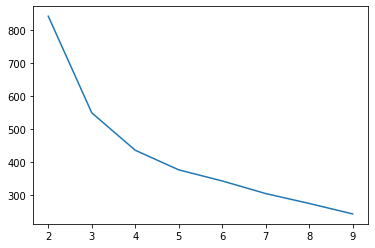

In [85]:
#Choosing optimal value of k using Elbow Curve method
ssd = []
for k in range(2, 10):
    model= KMeans(n_clusters = k).fit(df_scaled)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

In [86]:
#Choosing optimal value of k using Silhouette Score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4691889174699258
For n_clusters=3, the silhouette score is 0.40696104234052705
For n_clusters=4, the silhouette score is 0.3951654385518634
For n_clusters=5, the silhouette score is 0.3407917905249157
For n_clusters=6, the silhouette score is 0.30342329593504563
For n_clusters=7, the silhouette score is 0.30929619823018906
For n_clusters=8, the silhouette score is 0.3231749975240311


In [87]:
#Final model with k=4
kmeans = KMeans(n_clusters=3, max_iter=50,random_state =100)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [88]:
#adding the cluster labels to the dataframe 
df_km = pd.concat([df, pd.Series(kmeans.labels_)], axis =1)
df_km.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_new,imports_new,health_new,0
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,55.30,248.297,41.9174,0
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,1145.20,1987.740,267.8950,2
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,1712.64,1400.440,185.9820,2
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530.0,2199.19,1514.370,100.6050,0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,5551.00,7185.800,735.6600,2


## Cluster Profiling

In [89]:
#Cluster profiling using GDPP, Chil Mortalitity and Income
df_km.columns = ['country','child_mort','income','inflation','life_expec','total_fer','gdpp','exports','imports','health','label']
df_km.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,imports,health,label
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,55.30,248.297,41.9174,0
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,1145.20,1987.740,267.8950,2
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,1712.64,1400.440,185.9820,2
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530.0,2199.19,1514.370,100.6050,0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,5551.00,7185.800,735.6600,2


In [90]:
#Checking the number of points in each cluster
df_km.label.value_counts()

2    90
0    48
1    29
Name: label, dtype: int64

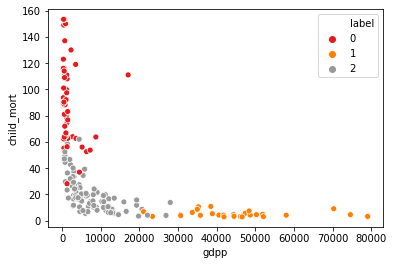

In [91]:
sns.scatterplot(x="gdpp",y ="child_mort",hue = 'label',data = df_km,palette = 'Set1')

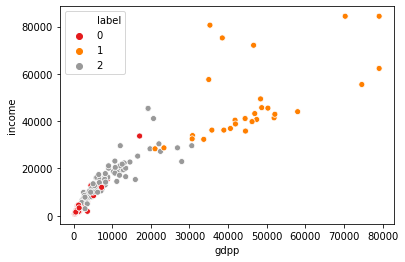

In [92]:
sns.scatterplot(x="gdpp",y ="income",hue = 'label',data = df_km,palette = 'Set1')

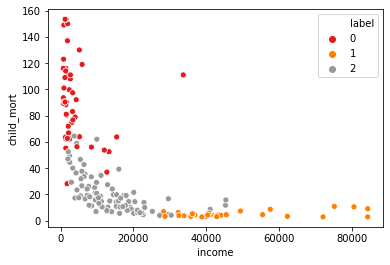

In [93]:
sns.scatterplot(x="income",y ="child_mort",hue = 'label',data = df_km,palette = 'Set1')

In [94]:
df_km.drop("country",axis=1).groupby('label').mean()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,imports,health
label,,,,,,,,,
0,90.335417,3901.010000,10.608604,59.567083,4.972233,1911.400833,879.097657,827.327888,114.821765
1,4.989655,47784.413793,2.906731,80.453103,1.757352,46068.137931,25405.359310,21316.695862,4253.879655
2,20.547778,13804.333333,7.131624,73.393333,2.242591,7808.577778,3477.250726,3589.291996,528.894338


In [95]:
df_km.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,imports,health,label
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,55.30,248.297,41.9174,0
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,1145.20,1987.740,267.8950,2
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,1712.64,1400.440,185.9820,2
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530.0,2199.19,1514.370,100.6050,0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,5551.00,7185.800,735.6600,2


In [96]:
df_km_profiling = df_km[['gdpp','income','child_mort','label','country']]

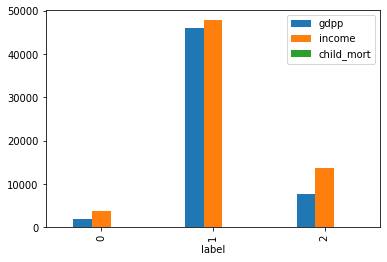

In [97]:
df_km_profiling.groupby('label').mean().plot(kind='bar')

In [98]:
df_km_profiling[df_km_profiling['label']==0].sort_values(by=['gdpp','child_mort','income'],ascending = [True,False,True])

,gdpp,income,child_mort,label,country
26,331.62,764.00,93.6,0,Burundi
88,331.62,742.24,89.3,0,Liberia
37,334.00,742.24,116.0,0,"Congo, Dem. Rep."
112,348.00,814.00,123.0,0,Niger
132,399.00,1220.00,153.4,0,Sierra Leone
93,413.00,1390.00,62.2,0,Madagascar
106,419.00,918.00,101.0,0,Mozambique
31,446.00,888.00,149.0,0,Central African Republic
94,459.00,1030.00,90.5,0,Malawi
50,482.00,1420.00,55.2,0,Eritrea


### Countries that are in aid of need are:
* #### Burundi
* #### Liberia
* #### Congo, Dem. Rep.
* #### Niger
* #### Sierra Leone

## Hierarchical Clustering

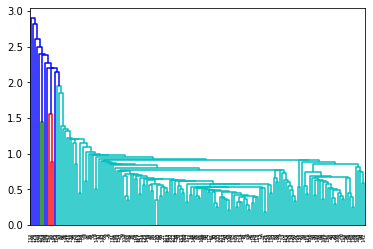

In [99]:
#Performing hierarchical clustering using single linkage
mergings = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

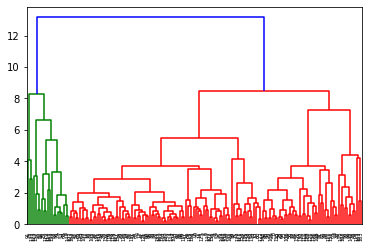

In [100]:
#Performing hierarchical clustering using complete linkage
mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [101]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [102]:
# assign cluster labels
df_km1 = pd.concat([df, pd.Series(cluster_labels)], axis =1)
df_km1.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_new,imports_new,health_new,0
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,55.30,248.297,41.9174,0
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,1145.20,1987.740,267.8950,1
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,1712.64,1400.440,185.9820,1
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530.0,2199.19,1514.370,100.6050,0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,5551.00,7185.800,735.6600,1


In [103]:
#Cluster profiling using GDPP, Chil Mortalitity and Income
df_km1.columns = ['country','child_mort','income','inflation','life_expec','total_fer','gdpp','exports','imports','health','label']
df_km1.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,imports,health,label
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,55.30,248.297,41.9174,0
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,1145.20,1987.740,267.8950,1
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,1712.64,1400.440,185.9820,1
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530.0,2199.19,1514.370,100.6050,0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,5551.00,7185.800,735.6600,1


In [104]:
#Checking the number of points in each cluster
df_km1.label.value_counts()

1    96
0    50
2    21
Name: label, dtype: int64

For hierarchical clustering, we can have 5 clusters out of which the last cluster , cluster number 3 and 4 we can consider it as an outlier cluster and can be treated separately as it is small.

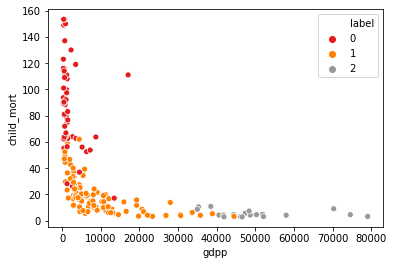

In [105]:
sns.scatterplot(x="gdpp",y ="child_mort",hue = 'label',data = df_km1,palette = 'Set1')

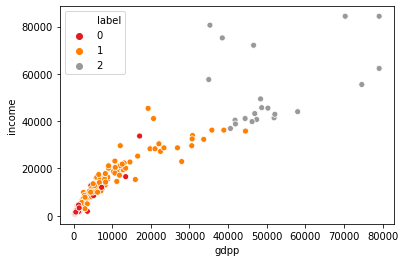

In [106]:
sns.scatterplot(x="gdpp",y ="income",hue = 'label',data = df_km1,palette = 'Set1')

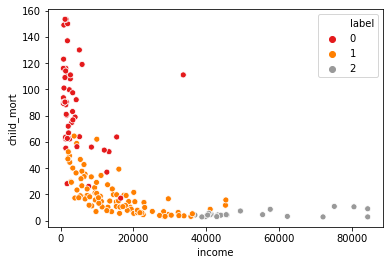

In [107]:
sns.scatterplot(x="income",y ="child_mort",hue = 'label',data = df_km1,palette = 'Set1')

In [108]:
df_km1.drop("country",axis=1).groupby('label').mean()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,imports,health
label,,,,,,,,,
0,87.586000,4229.169600,11.797820,60.016400,4.875544,2157.944800,945.634750,871.805773,126.369094
1,19.188542,15438.333333,5.936460,74.069479,2.181075,9849.187500,4326.711618,4474.111767,733.089171
2,5.176190,53421.333333,3.598248,80.298571,1.823962,51289.333333,29964.696190,24182.246667,4751.401429


In [109]:
df_km1_profiling = df_km1[['gdpp','income','child_mort','label','country']]

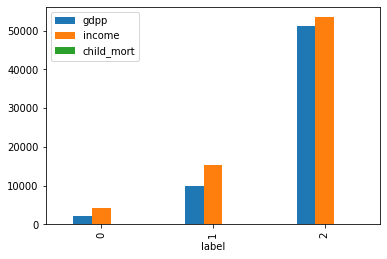

In [110]:
df_km1_profiling.groupby('label').mean().plot(kind='bar')

In [111]:
df_km1_profiling[df_km1_profiling['label']==0].sort_values(by=['gdpp','child_mort','income'],ascending = [True,False,True])

,gdpp,income,child_mort,label,country
26,331.62,764.00,93.6,0,Burundi
88,331.62,742.24,89.3,0,Liberia
37,334.00,742.24,116.0,0,"Congo, Dem. Rep."
112,348.00,814.00,123.0,0,Niger
132,399.00,1220.00,153.4,0,Sierra Leone
93,413.00,1390.00,62.2,0,Madagascar
106,419.00,918.00,101.0,0,Mozambique
31,446.00,888.00,149.0,0,Central African Republic
94,459.00,1030.00,90.5,0,Malawi
50,482.00,1420.00,55.2,0,Eritrea


### Countries that are in aid of need are:
* #### Burundi
* #### Liberia
* #### Congo, Dem. Rep.
* #### Niger
* #### Sierra Leone